In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Load CSV
df = pd.read_csv('sales_data.csv', sep=r'\s+', engine='python')

# Display first few rows
print(df.head())

         Date   Product Region  Quantity  Sales
0  2024-01-05    Laptop  North         3   2400
1  2024-01-07     Mouse  South        10    250
2  2024-01-10  Keyboard   East         6    600
3  2024-02-02    Laptop   West         2   1600
4  2024-02-06     Mouse  North         5    125


In [57]:
# Basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20 non-null     object
 1   Product   20 non-null     object
 2   Region    20 non-null     object
 3   Quantity  20 non-null     int64 
 4   Sales     20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes
None


In [59]:
# Summary statistics
print(df.describe())

        Quantity        Sales
count  20.000000    20.000000
mean    5.100000  1280.000000
std     2.425739  1026.061709
min     2.000000   125.000000
25%     3.000000   362.500000
50%     5.000000  1100.000000
75%     6.250000  2100.000000
max    10.000000  3200.000000


In [61]:
# Check missing values
print(df.isnull().sum())

Date        0
Product     0
Region      0
Quantity    0
Sales       0
dtype: int64


In [63]:
df.columns = df.columns.str.strip()

In [65]:
sales_by_product = df.groupby('Product')['Sales'].sum()
print(sales_by_product)

Product
Keyboard     2800
Laptop      12800
Monitor      9000
Mouse        1000
Name: Sales, dtype: int64


In [67]:
print(df.columns)

Index(['Date', 'Product', 'Region', 'Quantity', 'Sales'], dtype='object')


In [69]:
sales_by_region = df.groupby('Region')['Sales'].sum()
print(sales_by_region)

Region
East     4975
North    7825
South    9100
West     3700
Name: Sales, dtype: int64


In [71]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()
print(monthly_sales)

Date
2024-01    3250
2024-02    3725
2024-03    5400
2024-04    2300
2024-05    5800
2024-06    4275
2024-07     850
Freq: M, Name: Sales, dtype: int64


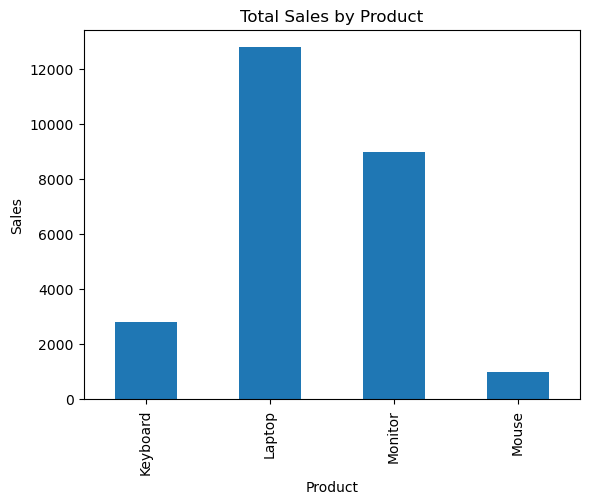

In [73]:
sales_by_product.plot(kind='bar', title='Total Sales by Product', ylabel='Sales', xlabel='Product')
plt.show()

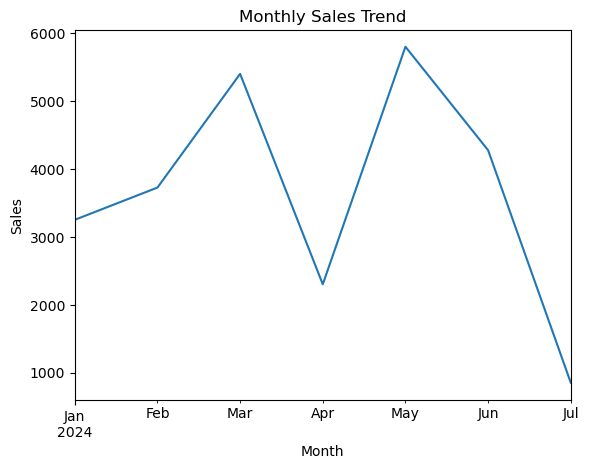

In [75]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend', ylabel='Sales', xlabel='Month')
plt.show()

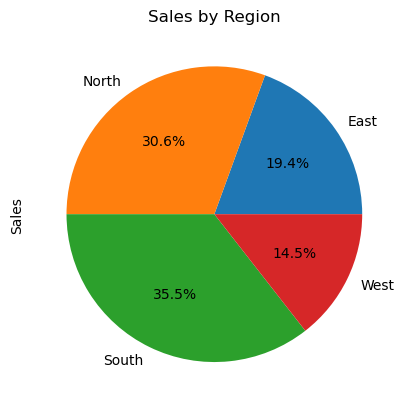

In [77]:
sales_by_region.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')
plt.show()